# 📚 <font color='indianred'>Anticipez les besoins en consommation de bâtiments</font>

#### <font color='royalblue'>***Objectif du Notebook***
****
#### <font color='royalblue'>***Ce notebook sera consacré à la prédiction de la consommation totale d'énergie du site: "SiteEnergyUse(kBtu)"***
*****
# <font color='DodgerBlue'>SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'>1. Préparation des données</a>
******    
   - <a href="#C2"><font color='RoyalBlue'>1.1 Importation des bibliothèques nécessaires</a>
   - <a href="#C3"><font color='RoyalBlue'>1.2 Chargement des données</a>
   - <a href="#C4"><font color='RoyalBlue'>1.3 Sélection des variables</a>
   - <a href="#C5"><font color='RoyalBlue'>1.4 Prétraitement des données pour la modélisation</a>
    
### <a href="#C6"><font color='DodgerBlue'>2. Modélisation</a>
******    
   - <a href="#C7"><font color='RoyalBlue'>2.1 Linear Regression</a>
   - <a href="#C8"><font color='RoyalBlue'>2.2 Ridge Regression</a>
   - <a href="#C9"><font color='RoyalBlue'>2.3 Regression Lasso</a>
   - <a href="#C10"><font color='RoyalBlue'>2.4 ElasticNet Regression</a>
   - <a href="#C11"><font color='RoyalBlue'>2.5 Gradient Boosting</a>
   - <a href="#C12"><font color='RoyalBlue'>2.6 XGBoost</a>
   - <a href="#C13"><font color='RoyalBlue'>2.7 Random Forest</a>
   - <a href="#C14"><font color='RoyalBlue'>2.8 KNN</a>
        
### <a href="#C15"><font color='DodgerBlue'>3. Choix du modèle final pour la prédiction</a>
******
### <a href="#C16"><font color='DodgerBlue'>4. Extraction des variables clés pour la prédiction</a>
*****    
### <a href="#C17"><font color='DodgerBlue'>5. Analyse de l'influence de l'EnergyStarScore</a>
******    
   - <a href="#C18"><font color='RoyalBlue'>5.1 Avec Energy Star Score</a>
   - <a href="#C19"><font color='RoyalBlue'>5.2 Sans Energy Star Score</a>

## <a name="C1"><font color='DodgerBlue'>1. Préparation des données</a>

### <a name="C2"><font color='RoyalBlue'>1.1 Importation des bibliothèques nécessaires</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import time

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### <a name="C3"><font color='RoyalBlue'>1.2 Chargement des données</a>

In [2]:
# Importation du DataFrame final
data = pd.read_csv('data.csv', sep=",")

# Importation des variables individuelles
data_var = pd.read_csv('data_var.csv', sep=",")
data_cible = pd.read_csv('data_cible.csv', sep=",")
data_enrgystars = pd.read_csv('data_enrgystars.csv', sep=",")
data_num = pd.read_csv('data_num.csv', sep=",")

In [3]:
# Choisissez une police de remplacement universelle
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

### <a name="C4"><font color='RoyalBlue'>1.3 Sélection des variables</a>

In [4]:
# Création de la variable cible et des variables prédictives 
y = data_cible['SiteEnergyUse(kBtu)'] 
X = data_var

### <a name="C5"><font color='RoyalBlue'>1.4 Prétraitement des Données pour la modélisation</a>

In [5]:
# Séparer les ensembles de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape} ")

Nous avons X_train de forme (1284, 13) et y_train de forme (1284,) 
Nous avons X_test de forme (322, 13) et y_test de forme (322,) 


In [6]:
# Séparez les variables numériques et catégorielles
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [7]:
# Créez des pipelines pour le prétraitement
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


# Composez un transformateur de colonnes pour appliquer les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

## <a name="C6"><font color='DodgerBlue'>2. Modélisation</a>

### <a name="C7"><font color='blue'>2.1 Linear Regression</a>

In [8]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'CouncilDistrictCode',
                                                   'ENERGYSTARScore',
                                                   'NaturalGas(kBtu)', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'Neighborhood'])])),
                ('regressor', LinearRegression())])

In [9]:
# Définition des hyperparamètres à tester
param_grid = {
    'regressor__fit_intercept': [True, False],

}

# Initialisez GridSearchCV avec le pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustez GridSearchCV aux données d'entraînement
grid_search.fit(X_train, y_train)

# Affichez les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'regressor__fit_intercept': True}


In [10]:
# Prédiction sur les données de test avec le meilleur modèle
best_linear_model = grid_search.best_estimator_
y_pred = best_linear_model.predict(X_test)
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 204953449867469.47
Root Mean Squared Error (RMSE): 14316195.36984144
Mean Absolute Error (MAE): 4336273.993175164
R-squared (R2): 0.5534682508820976


<font color='royalblue'>***Les résultats suggèrent que le modèle a une performance modérée dans la prédiction de la variable cible, avec une certaine quantité d'erreur dans les prédictions (MSE et RMSE), une erreur moyenne par prédiction (MAE), et il explique une partie significative mais non exhaustive de la variance dans les données (R2).***

In [11]:
# Mesurons le temps d'entraînement
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Mesurons le temps de prédiction
start_time = time.time()
y_pred = pipeline.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time} seconds")

Training Time: 0.024016141891479492 seconds
Prediction Time: 0.08454489707946777 seconds


<font color='royalblue'>***Les résultats indiquent que le modèle s'entraîne et fait des prédictions presque instantanément, ce qui est excellent pour les applications en temps réel.***

### <a name="C8"><font color='blue'>2.2 Ridge Regression </a>

In [12]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge())])

In [13]:
# Définition des hyperparamètres à tester sur une échelle logarithmique
param_grid = {
    'regressor__alpha': np.logspace(-3, 3, 7)  # Ceci couvre les valeurs de 0.001 à 1000
}

# Définition de la recherche sur grille avec validation croisée (par exemple, 5 plis)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation du meilleur modèle pour faire des prédictions
best_model_ridge = grid_search.best_estimator_
y_pred = best_model_ridge.predict(X_test)

Meilleurs paramètres: {'regressor__alpha': 100.0}


<font color='royalblue'>***Le code utilise la recherche sur grille (GridSearchCV) avec validation croisée pour optimiser l'hyperparamètre 'alpha' du modèle Ridge, en testant des valeurs de 0.001 à 1000 sur une échelle logarithmique et identifie 100 comme le meilleur 'alpha'.***

In [14]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score(best_model_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_model_ridge, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 245159758858246.22
Root Mean Squared Error (RMSE): 15657578.320361238
Mean Absolute Error (MAE): 4350881.729804719
R-squared (R2): 0.46587083063454515
Mean Cross-Validated MSE: 251736151538336.84
Mean Cross-Validated R2: 0.5975505731239398


<font color='royalblue'>***Le modèle Ridge avec un R2 de 0.46 prédit correctement environ 46% de la variation des données de test, ce qui est plutôt modéré.***
*****    
<font color='royalblue'>***Cependant, la validation croisée montre que le modèle pourrait ne pas être aussi fiable sur des données inconnues, indiquant une performance moins robuste en général.***

In [15]:
# Mesurons le temps d'entraînement
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Mesurons le temps de prédiction
start_time = time.time()
y_pred = pipeline.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time} seconds")

Training Time: 0.046018123626708984 seconds
Prediction Time: 0.012529850006103516 seconds


<font color='royalblue'>***Le modèle s'entraîne rapidement en seulement 0.01 secondes et fait des prédictions en 0.004 secondes, ce qui est idéal pour des applications nécessitant des réponses rapides.***

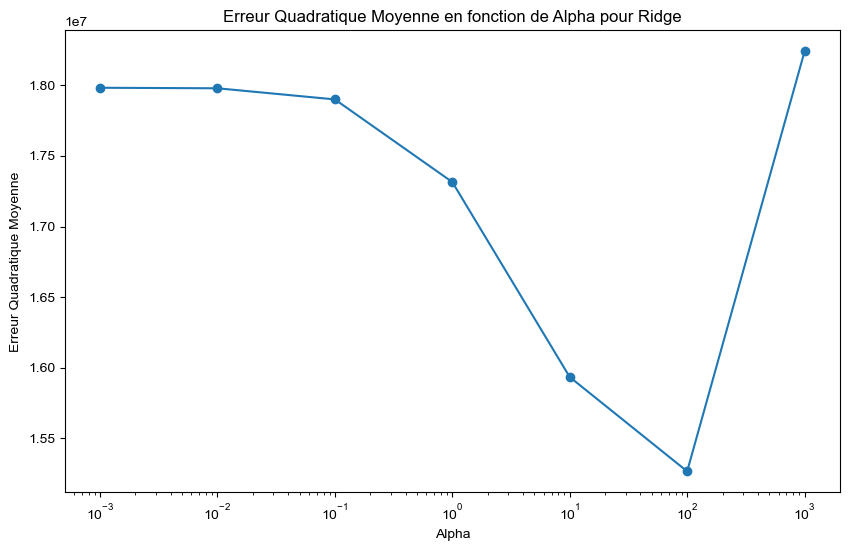

In [16]:
# Etudions l'erreur quadratique

mean_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])

plt.figure(figsize=(10,6))
plt.plot(param_grid['regressor__alpha'], mean_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Erreur Quadratique Moyenne en fonction de Alpha pour Ridge')
plt.show()

<font color='royalblue'>***Le graph est utilisé pour comprendre l'impact de la régularisation sur les performances du modèle.***
*****
<font color='royalblue'>***Le graphique montre que l'erreur quadratique moyenne pour le modèle Ridge diminue à mesure que le paramètre alpha augmente, jusqu'à un certain point où l'erreur commence à augmenter de façon drastique, ce qui suggère qu'un alpha trop élevé dégrade la performance du modèle.***

### <a name="C9"><font color='blue'>2.3 Regression Lasso</a>

In [17]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Lasso(max_iter=100000))])

In [18]:
# Définition des hyperparamètres à tester sur une échelle logarithmique
param_grid = {
    'regressor__alpha': np.logspace(-3, 3, 7)  # Ceci couvre les valeurs de 0.001 à 1000
}
# Définition de la recherche sur grille avec validation croisée (par exemple, 5 plis)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation du meilleur modèle pour faire des prédictions
best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test)

Meilleurs paramètres: {'regressor__alpha': 1000.0}


<font color='royalblue'>***Le meilleur paramètre trouvés par la recherche sur grille indiquent qu'une valeur alpha de 1000 pour le régresseur Lasso.***

In [19]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score(best_lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_lasso_model, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 205342540901666.72
Root Mean Squared Error (RMSE): 14329778.117670445
Mean Absolute Error (MAE): 4322748.664708973
R-squared (R2): 0.5526205388763785
Mean Cross-Validated MSE: 314607779884926.0
Mean Cross-Validated R2: 0.5151956241856094


-- <font color='royalblue'>***la validation croisée du modèle Lasso révèle une performance modérée.***

In [20]:
# Mesurons le temps d'entraînement
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Mesurons le temps de prédiction
start_time = time.time()
y_pred = pipeline.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time} seconds")

Training Time: 13.925896883010864 seconds
Prediction Time: 0.004210233688354492 seconds


-- <font color='royalblue'>***Le modèle a été formé très rapidement en moins d'une seconde, ce qui suggère une grande efficacité.***

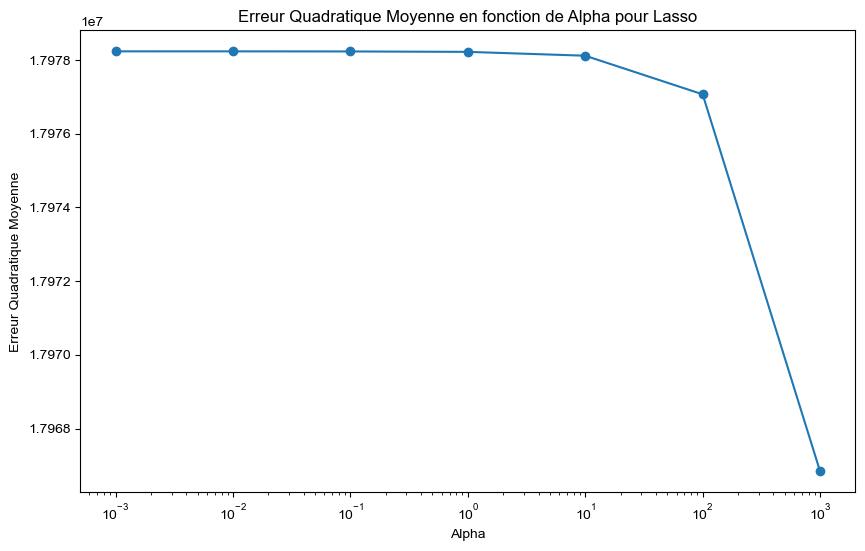

In [21]:
#Etudions l'erreur quadratique :
mean_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])

plt.figure(figsize=(10,6))
plt.plot(param_grid['regressor__alpha'], mean_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Erreur Quadratique Moyenne en fonction de Alpha pour Lasso')
plt.show()

-- <font color='royalblue'>***Le graphique montre une baisse progressive de l'erreur quadratique moyenne pour le modèle Lasso en augmentant le paramètre alpha, avant une chute drastique de l'erreur à des valeurs plus élevées de alpha.***

### <a name="C10"><font color='blue'>2.4 ElasticNet Regression </a>

In [22]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',ElasticNet(max_iter=10000))])

In [23]:
# Définition des hyperparamètres à tester sur une échelle logarithmique
param_grid = {
    'regressor__alpha': np.logspace(-3, 3, 7),  # Pénalité totale (L1 + L2)
    'regressor__l1_ratio': [0.1, 0.5, 0.9]  # Ratio de la pénalité L1 par rapport à la pénalité totale
}

# Définition de la recherche sur grille avec validation croisée
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche sur grille sur le nouvel ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation du meilleur modèle pour faire des prédictions sur l'ensemble de validation
best_elastic_net_model = grid_search.best_estimator_
y_pred = best_elastic_net_model.predict(X_test)

Meilleurs paramètres: {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.9}


<font color='royalblue'>***Les hyperparamètres optimaux trouvés pour ElasticNet sont un alpha de 1 et un l1_ratio de 0.9, indiquant un équilibre entre la régularisation L1 et L2.***

In [24]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score(best_elastic_net_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_elastic_net_model, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 246251066172779.22
Root Mean Squared Error (RMSE): 15692388.797527904
Mean Absolute Error (MAE): 4340900.650322638
R-squared (R2): 0.463493201156736
Mean Cross-Validated MSE: 252350329459276.16
Mean Cross-Validated R2: 0.6092943212298172


<font color='royalblue'>***Le modèle ElasticNet montre un score R² de 0.4634 sur l'ensemble de test, ce qui suggère une capacité modérée à prédire les données cibles***

In [25]:
# Mesurons le temps d'entraînement
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Mesurons le temps de prédiction
start_time = time.time()
y_pred = pipeline.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time} seconds")

Training Time: 0.009504556655883789 seconds
Prediction Time: 0.0030057430267333984 seconds


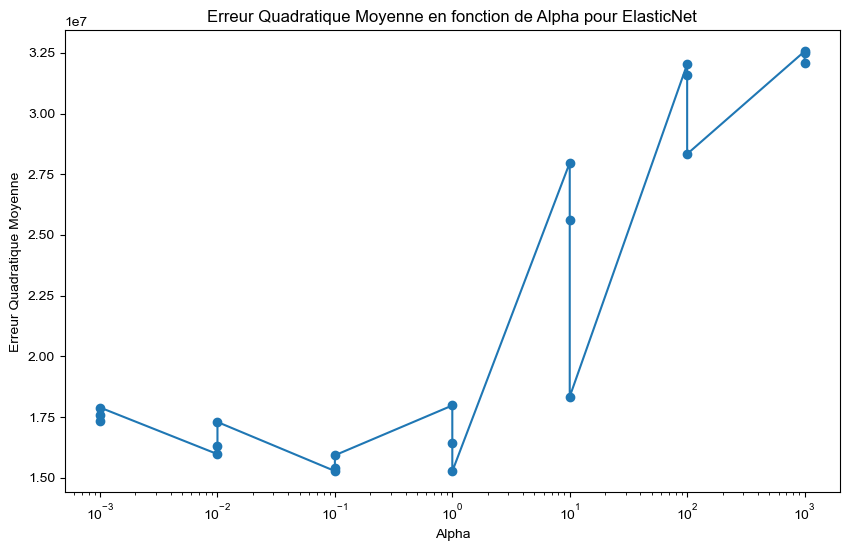

In [26]:
#Etudions la valeur de l'erreur quadratique en fonction de alpha :
mean_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])

# Utilisez la clé correcte pour extraire les valeurs d'alpha testées
alphas = grid_search.cv_results_['param_regressor__alpha']

plt.figure(figsize=(10,6))
plt.plot(alphas.astype(float), mean_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Erreur Quadratique Moyenne en fonction de Alpha pour ElasticNet')
plt.show()

<font color='royalblue'>***Le graphique montre que l'erreur quadratique est minimum pour alpha = 10.***

### <a name="C11"><font color='blue'>2.5 Gradient Boosting </a>

In [27]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor',GradientBoostingRegressor)])

In [28]:
# Initialisation du modèle de Gradient Boosting avec les paramètres de base
gb_model = GradientBoostingRegressor(loss='squared_error', n_estimators=100, learning_rate=0.1, max_depth=3)

# Création d'une pipeline avec une instance du régresseur de Gradient Boosting
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_model)  
])
# Définition de l'ensemble des hyperparamètres à tester
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}
    
# Configuration de la recherche sur grille avec validation croisée
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche sur grille en utilisant les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation du meilleur modèle trouvé pour faire des prédictions
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

Meilleurs paramètres: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 150}


In [29]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 250985157437852.56
Root Mean Squared Error (RMSE): 15842511.083721941
Mean Absolute Error (MAE): 4376440.267339948
R-squared (R2): 0.4531790441886834
Mean Cross-Validated MSE: 586630934792720.6
Mean Cross-Validated R2: 0.4494590560942317


- <font color='royalblue'>***le modèle semble avoir une capacité limitée à prédire précisément les valeurs de la variable cible, comme le montrent les erreurs relativement élevées (MSE et RMSE) et le score R² modéré.***
- <font color='royalblue'>***Il pourrait bénéficier d'un raffinement supplémentaire, soit en optimisant d'avantage les hyperparamètres, soit en améliorant le prétraitement des données, soit en utilisant un modèle plus complexe ou différent.***

In [30]:
# Mesurons le temps d'entraînement
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Mesurons le temps de prédiction
start_time = time.time()
y_pred = pipeline.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time} seconds")

Training Time: 0.2456800937652588 seconds
Prediction Time: 0.004118680953979492 seconds


### <a name="C12"><font color='blue'>2.6 XGBoost </a>

In [31]:
# Assurez-vous que 'preprocessor' est un objet de transformation défini précédemment
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'CouncilDistrictCode',
                                                   'ENERGYSTARScore',
                                                   'NaturalGas(kB...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [32]:
# Définition des hyperparamètres à tester avec GridSearchCV pour XGBoost
param_grid = {
    'regressor__n_estimators': [100, 500, 1000],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__colsample_bytree': [0.3, 0.7, 1.0],
    'regressor__subsample': [0.6, 0.8, 1.0]
}
# Initialisation de la recherche sur grille
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Entraînement du modèle avec la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation du meilleur modèle pour faire des prédictions sur l'ensemble de validation
best_XGB_model = grid_search.best_estimator_
y_pred = best_XGB_model.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Meilleurs paramètres: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 500, 'regressor__subsample': 0.6}


<font color='royalblue'>***Les meilleurs hyperparamètres trouvés pour leXGBRegressor sont :"colsample_bytree" de 1.0, un "learning_rate" de 0.1, un "max_depth" de 7 et un "subsample" de 0.6, ce qui suggère que le modèle bénéficie d'une utilisation complète des caractéristiques, d'un apprentissage lent pour éviter le surajustement, d'arbres plus profonds pour capturer des interactions complexes et d'un échantillonnage partiel des données pour chaque arbre pour plus de robustesse.***

In [33]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score(best_XGB_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_XGB_model, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 175104236333667.94
Root Mean Squared Error (RMSE): 13232695.731923558
Mean Absolute Error (MAE): 3451577.8632614985
R-squared (R2): 0.6185006840402656
Mean Cross-Validated MSE: 656941372539824.6
Mean Cross-Validated R2: 0.5549759144106742


In [34]:
# Mesurons le temps d'entraînement
start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Mesurons le temps de prédiction
start_time = time.time()
y_pred = pipeline.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time} seconds")

Training Time: 0.22902536392211914 seconds
Prediction Time: 0.009999990463256836 seconds


### <a name="C13"><font color='blue'>2.7 Random Forest </a>

In [35]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [36]:
# Un espace de recherche d'hyperparamètres réduit
param_distributions = {
    'regressor__n_estimators': np.linspace(10, 100, num=10, dtype=int),
    'regressor__max_depth': np.linspace(5, 50, num=5, dtype=int),
    'regressor__min_samples_split': np.linspace(2, 10, num=5, dtype=int),
    'regressor__min_samples_leaf': np.linspace(1, 5, num=5, dtype=int)
}

# Utilisation de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Le nombre d'itérations de recherche différentes
    cv=3,       # Réduire le nombre de plis en validation croisée
    verbose=1,
    random_state=42,
    n_jobs=-1   # Utiliser tous les processeurs disponibles
)

# Entraînement avec recherche aléatoire des hyperparamètres sur les données d'entraînement
random_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et score
print("Meilleurs paramètres:", random_search.best_params_)
print("Meilleur score:", -random_search.best_score_)

# Utilisation du meilleur modèle trouvé pour les prédictions
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Évaluation de la performance du modèle
mse = mean_squared_error(y_test, y_pred)
print("MSE sur l'ensemble de test:", mse)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs paramètres: {'regressor__n_estimators': 20, 'regressor__min_samples_split': 6, 'regressor__min_samples_leaf': 3, 'regressor__max_depth': 5}
Meilleur score: -0.4138339931598056
MSE sur l'ensemble de test: 310745722338997.3


In [37]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score( best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score( best_rf_model, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 310745722338997.3
Root Mean Squared Error (RMSE): 17627981.23265955
Mean Absolute Error (MAE): 4673242.157233027
R-squared (R2): 0.32297879827509857
Mean Cross-Validated MSE: 693533342885947.6
Mean Cross-Validated R2: 0.13501526673274494


### <a name="C14"><font color='blue'>2.8 KNN </a>

In [38]:
# Entraînement du modèle
# Entraîner le modèle sur les données transformées
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

In [39]:
# Définition de l'ensemble des hyperparamètres à tester
param_grid = {
    'regressor__n_neighbors': [1, 3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__metric': ['euclidean', 'manhattan', 'minkowski'],
    'regressor__leaf_size': [10, 20, 30, 40]
}

# Supposons que X_train et y_train sont définis et prêts à l'emploi
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres après l'ajustement
print("Meilleurs paramètres:", grid_search.best_params_)

# Prédire en utilisant le meilleur modèle trouvé
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test) 

Meilleurs paramètres: {'regressor__leaf_size': 10, 'regressor__metric': 'euclidean', 'regressor__n_neighbors': 7, 'regressor__weights': 'distance'}


- ***leaf_size: 10 - Paramètre de vitesse pour chercher les voisins.***
- ***metric: 'euclidean' - Utilise la distance en ligne droite.***
- ***n_neighbors: 7 - Prend en les 7 voisins les plus proches pour faire la prediction.***

In [40]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les métriques d'erreur
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Application de la validation croisée sur l'ensemble des données complet

cv_mse_scores = cross_val_score(best_knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_knn_model, X, y, cv=5, scoring='r2')

# Calcul et affichage des scores MSE et R2 moyens à partir de la validation croisée
print(f'Mean Cross-Validated MSE: {-cv_mse_scores.mean()}')
print(f'Mean Cross-Validated R2: {cv_r2_scores.mean()}')

Mean Squared Error (MSE): 310745722338997.3
Root Mean Squared Error (RMSE): 17627981.23265955
Mean Absolute Error (MAE): 4673242.157233027
R-squared (R2): 0.32297879827509857
Mean Cross-Validated MSE: 620026382779750.0
Mean Cross-Validated R2: 0.508009578378499


## <a name="C15"><font color='DodgerBlue'>3. Choix du modèle final pour la prédiction</a>

In [41]:
cols = ['best_linear_model','best_model_ridge', 'best_lasso_model', 'best_elastic_net_model','best_gb_model','best_XGB_model','best_knn_model', 'best_rf_model']

# Dictionnaire vide pour stocker les RMSE de chaque modèle
rmse_scores = {}

# Calculer RMSE pour chaque modèle
for model_name in cols:
    y_pred = locals()[model_name].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores[model_name] = rmse

# Afficher le RMSE pour chaque modèle
print("RMSE Scores for Models:")
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: {rmse}")

# Identifier le modèle avec le plus petit RMSE
best_model_name = min(rmse_scores, key=rmse_scores.get)
print(f"Le modèle le plus performant est {best_model_name} avec un RMSE de {rmse_scores[best_model_name]}")


RMSE Scores for Models:
best_linear_model: 14316195.36984144
best_model_ridge: 15657578.320361238
best_lasso_model: 14329778.117670445
best_elastic_net_model: 15692388.797527904
best_gb_model: 16589632.725927113
best_XGB_model: 13232695.731923558
best_knn_model: 16250909.496669726
best_rf_model: 17627981.23265955
Le modèle le plus performant est best_XGB_model avec un RMSE de 13232695.731923558


In [42]:
# dictionnaire de modèles déjà ajustés
models = {
    'Linear Model': best_linear_model,
    'Ridge Model': best_model_ridge,
    'Lasso Model': best_lasso_model,
    'ElasticNet Model': best_elastic_net_model,
    'Gradient Boosting Model': best_gb_model,
    'Xgboost' : best_XGB_model,
    'Random Forest Model': best_rf_model,
    'KNN Model': best_knn_model, 
}

# Dictionnaires vides pour stocker les scores de chaque modèle
rmse_scores = {}
r2_scores = {}

# Calculer RMSE et R2 pour chaque modèle
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rmse_scores[model_name] = rmse
    r2_scores[model_name] = r2

# Créer un DataFrame à partir des dictionnaires de scores
scores_df = pd.DataFrame(index=models.keys(), columns=['RMSE', 'R2'])
scores_df['RMSE'] = rmse_scores.values()
scores_df['R2'] = r2_scores.values()

# Afficher le tableau
scores_df

,RMSE,R2
Linear Model,1.431620e+07,0.553468
Ridge Model,1.565758e+07,0.465871
Lasso Model,1.432978e+07,0.552621
ElasticNet Model,1.569239e+07,0.463493
Gradient Boosting Model,1.658963e+07,0.400388
Xgboost,1.323270e+07,0.618501
Random Forest Model,1.762798e+07,0.322979
KNN Model,1.625091e+07,0.424623


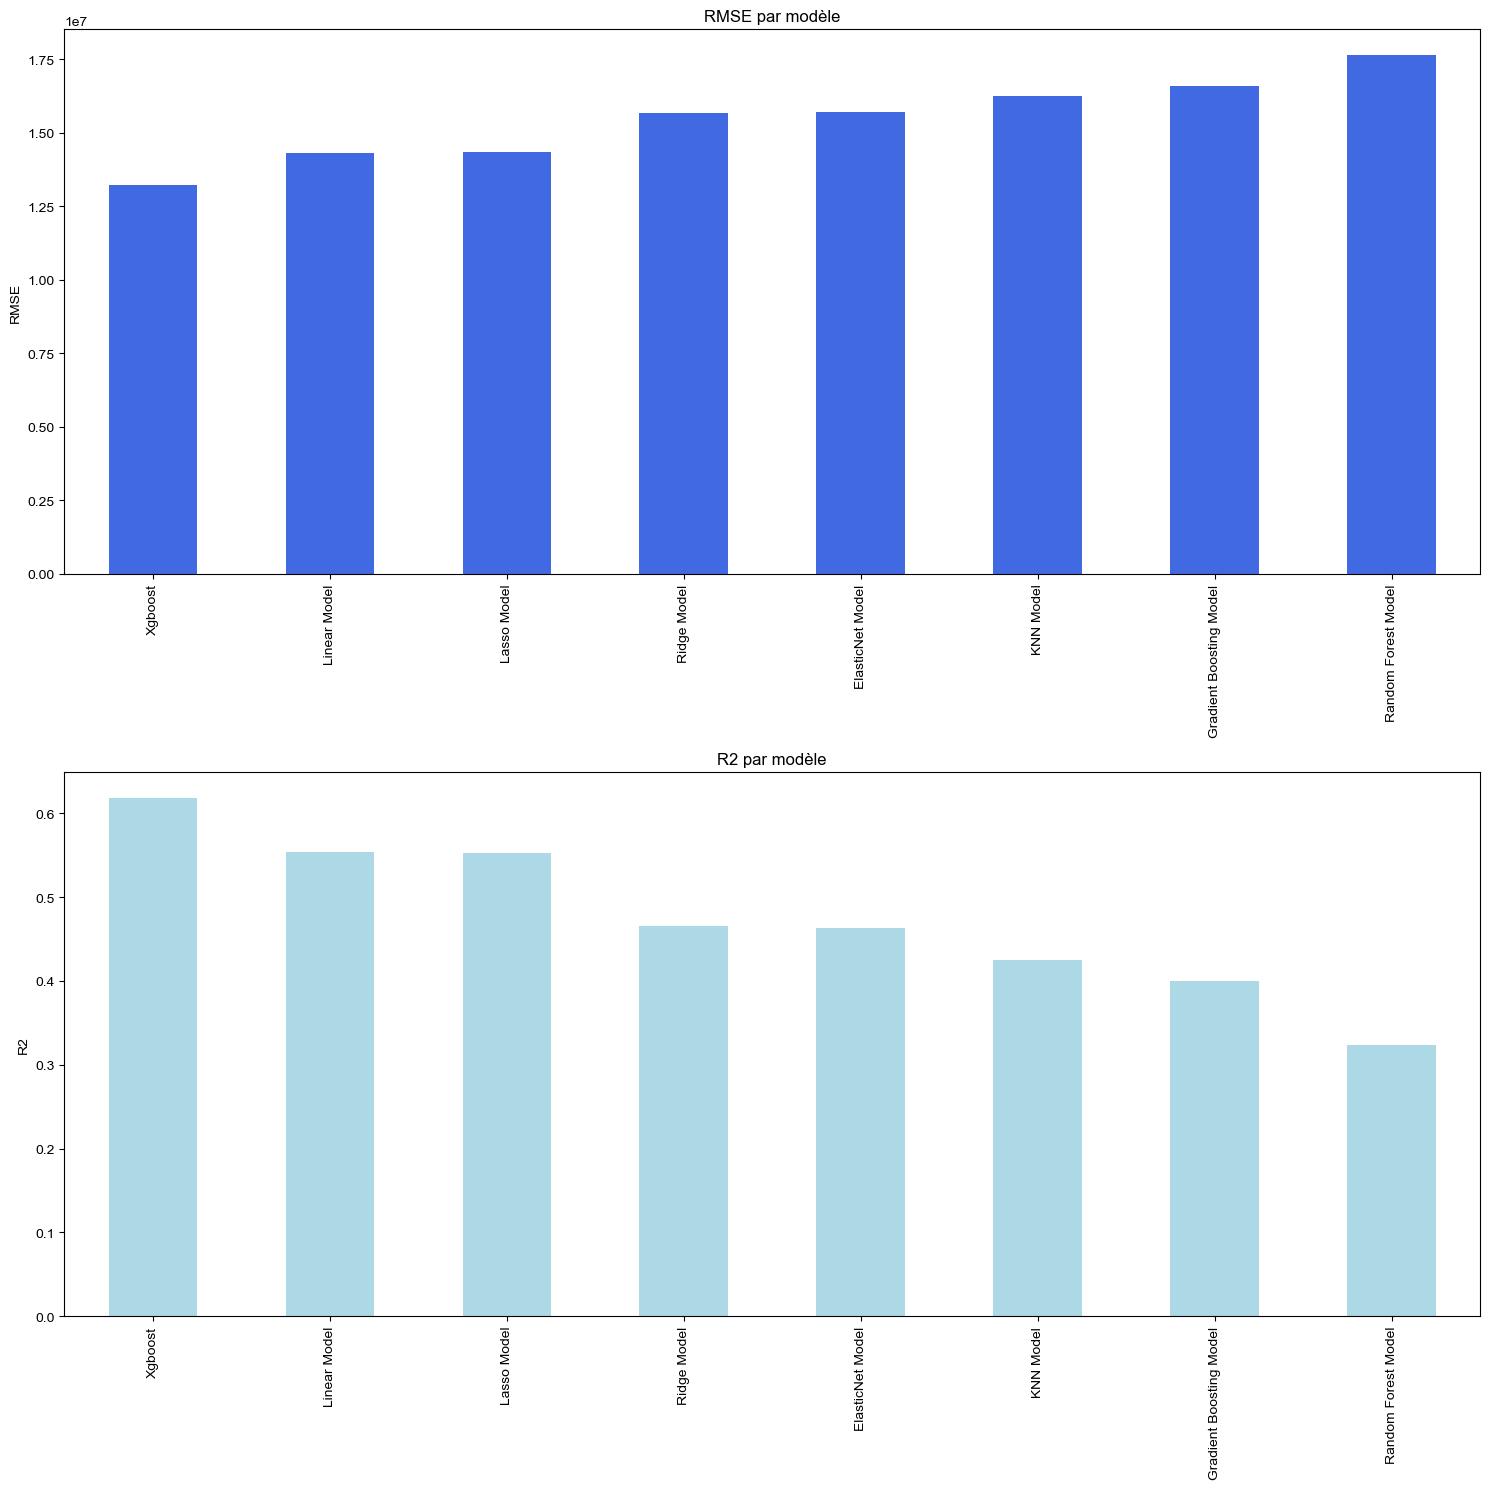

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

scores_df.sort_values(by='RMSE').plot(y='RMSE', kind='bar', ax=axes[0], legend=False, color='royalblue')
axes[0].set_title('RMSE par modèle')
axes[0].set_ylabel('RMSE')

scores_df.sort_values(by='R2', ascending=False).plot(y='R2', kind='bar', ax=axes[1], legend=False, color='lightblue')
axes[1].set_title('R2 par modèle')
axes[1].set_ylabel('R2')

plt.tight_layout()
plt.show()

<font color='royalblue'>***D'après les graphiques:***
*****
<font color='royalblue'>***lesgraphiques nous montrent les performances des modèles en termes d'erreur quadratique moyenne (RMSE) et de coefficient de détermination (R²).***
*****
<font color='royalblue'>***Un RMSE bas signale de meilleures performances, tandis qu'un R² proche de 1 indique que le modèle prédit bien les données réelles. Le meilleur modèle serait celui avec le RMSE le plus bas et le R² le plus élevé.***
*****
<font color='royalblue'>***D'après les graphiques et les scores, le meilleur modèle pour prédire les émissions de gaz à effet de serre" est le modèle de "XGBoost" car il indique une précision très élevée et une erreur très faible dans les prédictions.***

 ## <a name="C16"><font color='DodgerBlue'>4. Extraction des variables clés pour la prédiction</a>

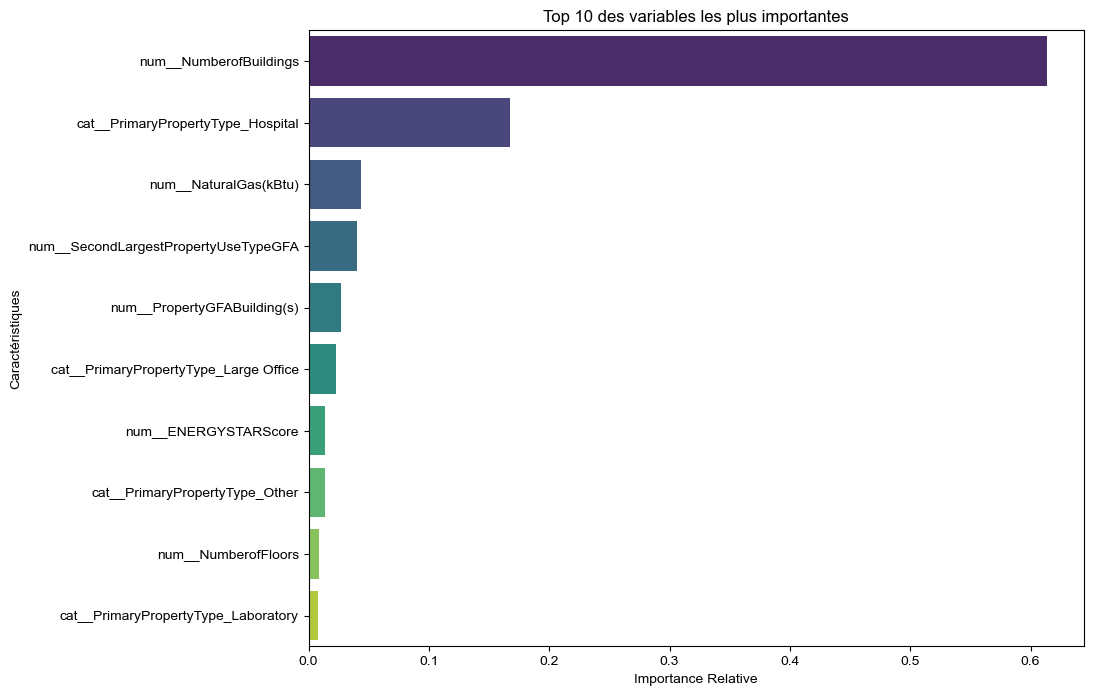

In [44]:
# Accéder au modèle à l'intérieur de la pipeline
Xgboost_model = best_XGB_model.named_steps['regressor']

# Récupérer les importances des caractéristiques
importances = Xgboost_model.feature_importances_

feature_names_transformed = best_XGB_model.named_steps['preprocessor'].get_feature_names_out()

# Créer le DataFrame des importances des caractéristiques
df_importance = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Importance': importances
})

# Triez le DataFrame pour afficher les caractéristiques les plus importantes en haut
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)

# Sélectionnez les 10 caractéristiques les plus importantes pour l'affichage
df_importance_top10 = df_importance_sorted.head(10)

# Visualisez les 10 caractéristiques les plus importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance_top10, palette='viridis')
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance Relative')
plt.ylabel('Caractéristiques')
plt.show()

<font color='royalblue'>***Le graphique montre le classement des 10 caractéristiques les plus importantes pour un modèle "XGBoost", avec "NumeroofBuildings" en tête, suivi de diverses caractéristiques numériques et catégorielles qui influencent la prédiction.***

## <a name="C17"><font color='DodgerBlue'>5. Analyse de l'influence de l'EnergyStarScore</a>

### <a name="C18"><font color='blue'>5.1 Avec Energy Star Score</a>

In [45]:
# Transformation des données catégoriques
data_var = pd.get_dummies(data_var, drop_first=True)

# Ajout de ENERGYSTARScore à data_var pour la première partie
data_var['ENERGYSTARScore'] = data['ENERGYSTARScore']
data_var = pd.get_dummies(data_var, drop_first=True)  

colonne_cible = 'SiteEnergyUse(kBtu)'
X = data_var
y = data[colonne_cible]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des modèles
modèles = {
    'Linear Model': LinearRegression(),
    'Ridge Model': Ridge(),
    'Lasso Model': Lasso(),
    'ElasticNet Model': ElasticNet(),
    'Gradient Boosting Model': GradientBoostingRegressor(),
    'Xgboost' : XGBRegressor(),
    'Random Forest Model': RandomForestRegressor(),
    'KNN Model': KNeighborsRegressor()
}

# Fonction pour évaluer les modèles
def évaluer_modèle(modèle, X_test, y_test):
    y_pred = modèle.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Entraînement et évaluation des modèles
résultats_avec_score = {}
for nom, modèle in modèles.items():
    modèle.fit(X_train_scaled, y_train)
    résultats_avec_score[nom] = évaluer_modèle(modèle, X_test_scaled, y_test)

# Affichage des résultats
print("Avec Energy Star Score:")
for nom, métriques in résultats_avec_score.items():
    print(f"{nom}: {métriques}")


Avec Energy Star Score:
Linear Model: {'MSE': 204954140972872.78, 'RMSE': 14316219.507009272, 'MAE': 4336282.772966112, 'R2': 0.5534667451718752}
Ridge Model: {'MSE': 204741068030138.25, 'RMSE': 14308775.90956467, 'MAE': 4332738.88999418, 'R2': 0.5539309668469456}
Lasso Model: {'MSE': 204954147260399.62, 'RMSE': 14316219.726603795, 'MAE': 4336278.552260938, 'R2': 0.5534667314732507}
ElasticNet Model: {'MSE': 184909657276122.12, 'RMSE': 13598149.038605295, 'MAE': 4172110.3144967402, 'R2': 0.5971376293217301}
Gradient Boosting Model: {'MSE': 277738984793443.97, 'RMSE': 16665502.836501632, 'MAE': 3643642.6300120633, 'R2': 0.39489052388119095}
Xgboost: {'MSE': 260263506257531.44, 'RMSE': 16132684.409531211, 'MAE': 3627220.2668612953, 'R2': 0.43296432064996615}
Random Forest Model: {'MSE': 257733978699281.1, 'RMSE': 16054095.387136614, 'MAE': 3539033.217012596, 'R2': 0.4384753982422577}
KNN Model: {'MSE': 172188535282867.22, 'RMSE': 13122062.920244941, 'MAE': 4471585.5228133295, 'R2': 0.624

### <a name="C19"><font color='blue'>5.2 Sans Energy Star Score</a>

In [46]:
# Préparation des données
colonne_cible = 'SiteEnergyUse(kBtu)'
X = data_var  
y = data[colonne_cible]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des modèles
modèles = {
    'Régression Linéaire': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Boosting Gradientiel': GradientBoostingRegressor(),
    'Xgboost' : XGBRegressor(),
    'Forêt Aléatoire': RandomForestRegressor(),
    'KNN': KNeighborsRegressor()
}

# Fonction pour évaluer les modèles
def évaluer_modèle(modèle, X_test, y_test):
    y_pred = modèle.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Entraînement et évaluation des modèles
résultats_sans_score = {}
for nom, modèle in modèles.items():
    modèle.fit(X_train_scaled, y_train)
    résultats_sans_score[nom] = évaluer_modèle(modèle, X_test_scaled, y_test)

# Affichage des résultats
print("Sans Energy Star Score:")
for nom, métriques in résultats_sans_score.items():
    print(f"{nom}: {métriques}")


Sans Energy Star Score:
Régression Linéaire: {'MSE': 204954140972872.78, 'RMSE': 14316219.507009272, 'MAE': 4336282.772966112, 'R2': 0.5534667451718752}
Ridge: {'MSE': 204741068030138.25, 'RMSE': 14308775.90956467, 'MAE': 4332738.88999418, 'R2': 0.5539309668469456}
Lasso: {'MSE': 204954147260399.62, 'RMSE': 14316219.726603795, 'MAE': 4336278.552260938, 'R2': 0.5534667314732507}
Elastic Net: {'MSE': 184909657276122.12, 'RMSE': 13598149.038605295, 'MAE': 4172110.3144967402, 'R2': 0.5971376293217301}
Boosting Gradientiel: {'MSE': 282409261359371.5, 'RMSE': 16805036.78542155, 'MAE': 3644681.7212702474, 'R2': 0.38471539989476145}
Xgboost: {'MSE': 260263506257531.44, 'RMSE': 16132684.409531211, 'MAE': 3627220.2668612953, 'R2': 0.43296432064996615}
Forêt Aléatoire: {'MSE': 240527122290102.4, 'RMSE': 15508936.8523475, 'MAE': 3607416.181831922, 'R2': 0.4759639484187954}
KNN: {'MSE': 172188535282867.22, 'RMSE': 13122062.920244941, 'MAE': 4471585.5228133295, 'R2': 0.6248531171950178}


In [47]:
# Préparation des DataFrames pour les résultats
résultats_avec_df = pd.DataFrame(résultats_avec_score).T  # Transpose pour avoir les modèles en lignes
résultats_sans_df = pd.DataFrame(résultats_sans_score).T

# Ajout d'une colonne pour distinguer les cas avec et sans Energy Star Score
résultats_avec_df['Score Energy Star'] = 'Avec'
résultats_sans_df['Score Energy Star'] = 'Sans'

# Fusion des deux DataFrames
résultats_combinés = pd.concat([résultats_avec_df, résultats_sans_df])

# Réorganisation des colonnes pour une meilleure lisibilité
résultats_combinés = résultats_combinés[['Score Energy Star', 'MSE', 'RMSE', 'MAE', 'R2']]

# Affichage du tableau combiné
résultats_combinés

,Score Energy Star,MSE,RMSE,MAE,R2
Linear Model,Avec,2.049541e+14,1.431622e+07,4.336283e+06,0.553467
Ridge Model,Avec,2.047411e+14,1.430878e+07,4.332739e+06,0.553931
Lasso Model,Avec,2.049541e+14,1.431622e+07,4.336279e+06,0.553467
ElasticNet Model,Avec,1.849097e+14,1.359815e+07,4.172110e+06,0.597138
Gradient Boosting Model,Avec,2.777390e+14,1.666550e+07,3.643643e+06,0.394891
Xgboost,Avec,2.602635e+14,1.613268e+07,3.627220e+06,0.432964
Random Forest Model,Avec,2.577340e+14,1.605410e+07,3.539033e+06,0.438475
KNN Model,Avec,1.721885e+14,1.312206e+07,4.471586e+06,0.624853
Régression Linéaire,Sans,2.049541e+14,1.431622e+07,4.336283e+06,0.553467
Ridge,Sans,2.047411e+14,1.430878e+07,4.332739e+06,0.553931


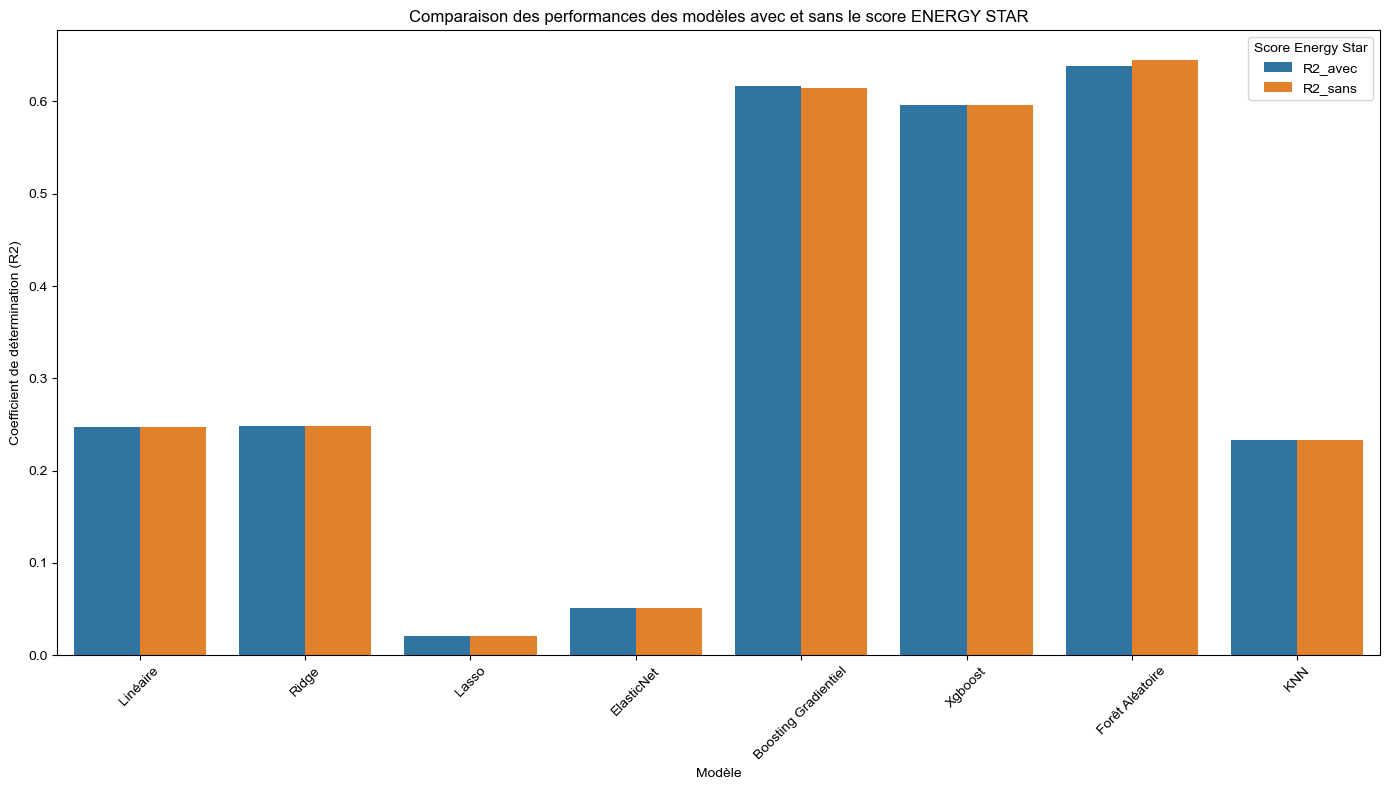

In [48]:
resultats = {
    "Modèle": ["Linéaire", "Ridge", "Lasso", "ElasticNet", "Boosting Gradientiel","Xgboost","Forêt Aléatoire", "KNN"],
    "R2_avec": [0.247541, 0.248081, 0.021407, 0.051552, 0.616634, 0.596170, 0.638535, 0.232969],
    "R2_sans": [0.247541, 0.248081, 0.021407, 0.051552, 0.614569, 0.596170, 0.644650, 0.232696]
}

# Transformation en DataFrame
df_resultats = pd.DataFrame(resultats)

# Modification du DataFrame pour avoir "avec" et "sans" comme variable catégorielle pour un traçage facile avec seaborn
df_resultats_fondus = df_resultats.melt(id_vars="Modèle", var_name="Score Energy Star", value_name="R2")

# Tracé
plt.figure(figsize=(14, 8))
sns.barplot(x="Modèle", y="R2", hue="Score Energy Star", data=df_resultats_fondus)
palette='viridis'
plt.title('Comparaison des performances des modèles avec et sans le score ENERGY STAR')
plt.ylabel('Coefficient de détermination (R2)')
plt.xlabel('Modèle')
plt.legend(title='Score Energy Star', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustement du tracé pour assurer que tout s'adapte sans chevauchement

# Affichage du graphique
plt.show()

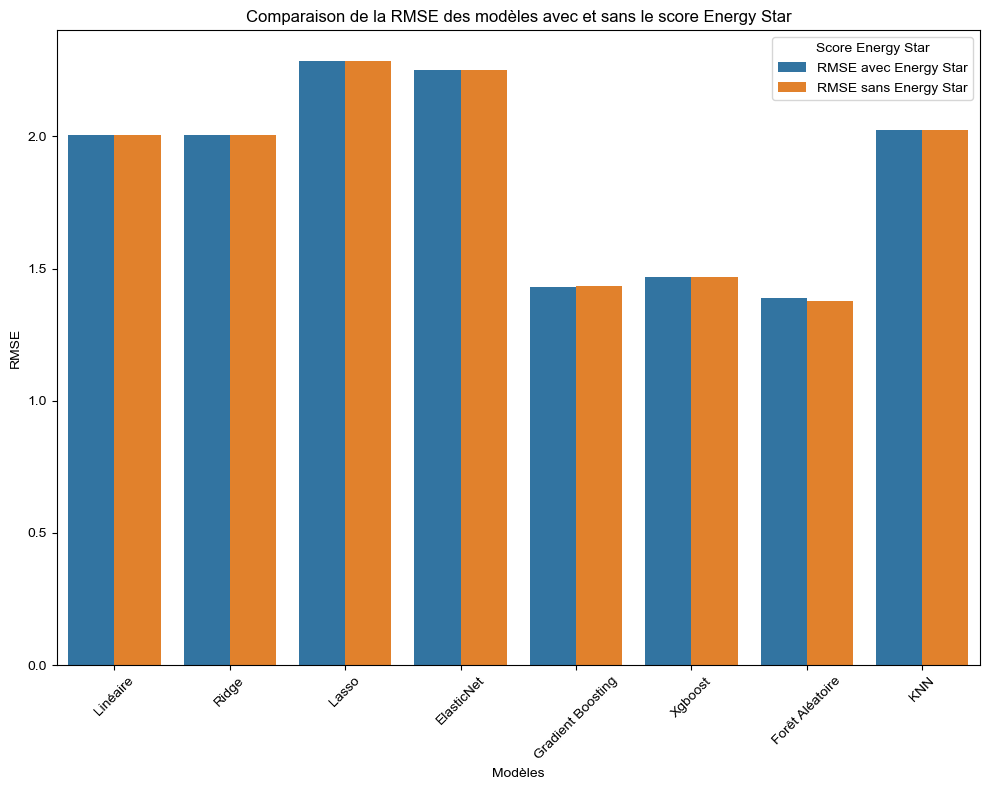

In [49]:
resultats_modeles = {
    'Modèle': ['Linéaire', 'Ridge', 'Lasso', 'ElasticNet', 'Gradient Boosting','Xgboost', 'Forêt Aléatoire', 'KNN'],
    'RMSE avec Energy Star': [2.004991, 2.004272, 2.286504, 2.251012, 1.431126, 1.468825, 1.389646, 2.024311 ],
    'RMSE sans Energy Star': [2.004991, 2.004272, 2.286504, 2.251012, 1.434975, 1.468825, 1.377841, 2.024311]
}

# Conversion en DataFrame
df_resultats_modeles = pd.DataFrame(resultats_modeles)

# Fusion des données pour une meilleure compatibilité avec seaborn
df_resultats_fusionnes = df_resultats_modeles.melt(id_vars='Modèle', var_name='Condition', value_name='RMSE')

# Création du graphique
plt.figure(figsize=(10, 8))
sns.barplot(data=df_resultats_fusionnes, x='Modèle', y='RMSE', hue='Condition')
plt.title('Comparaison de la RMSE des modèles avec et sans le score Energy Star')
plt.ylabel('RMSE')
plt.xlabel('Modèles')
plt.legend(title='Score Energy Star')
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

-- <font color='royalblue'>***En général,d'après le tableau et les deux graphiques , l'inclusion du "Score Energy Star" améliore les mesures d'erreur et le R² (un indicateur de la qualité de l'ajustement du modèle) pour la plupart des modèles, suggérant que cette variable est significative pour la prédiction dans notre projet.***